In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from pylab import rcParams 

rcParams['figure.figsize'] = 10, 5 

In [3]:
titanic_df = pd.read_csv('Data/TitanicDataset.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 1. Створити графіки для віку пасажирів та ціни білетів на одній області та на двох областях (одній над іншою).

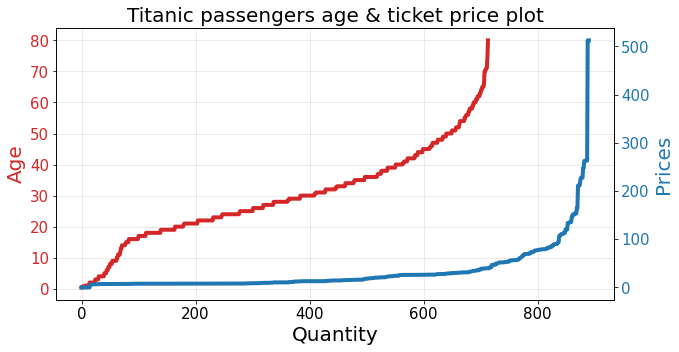

In [4]:
fig, ax1 = plt.subplots()

color='tab:red'

ax1.grid(alpha=0.2, color='grey')

ax1.set_title('Titanic passengers age & ticket price plot', fontsize=20)
ax1.plot(titanic_df.index, titanic_df['Age'].sort_values(), color=color, linewidth=4)
ax1.set_ylabel('Age', fontsize=20, color=color)
ax1.set_xlabel('Quantity', fontsize=20)
ax1.tick_params(axis='y', labelsize=15, labelcolor=color)
ax1.tick_params(axis='x', labelsize=15)

ax2 = ax1.twinx()

color='tab:blue'

ax2.plot(titanic_df.index, titanic_df['Fare'].sort_values(), color=color, linewidth=4)
ax2.tick_params(axis='y', labelsize=15, labelcolor=color)
ax2.set_ylabel('Prices', fontsize=20, color=color)

plt.show()

### 2. Створити гістограму для статі пасажирів (кількість пасажирів тої чи іншої статі) та кількості що вижили залежно від статі.

In [5]:
titanic_df['Status'] = np.where(titanic_df['Survived']==1,'Alive','Dead')

In [6]:
mask1 = dict(titanic_df.groupby(by=['Sex']).count()['PassengerId'])
mask2 = dict(titanic_df.groupby(by=['Status', 'Sex']).count()['PassengerId'])

In [7]:
mask2k = ['_'.join(w) for w in mask2.keys()]
mask2v = mask2.values()
mask2k

['Alive_female', 'Alive_male', 'Dead_female', 'Dead_male']

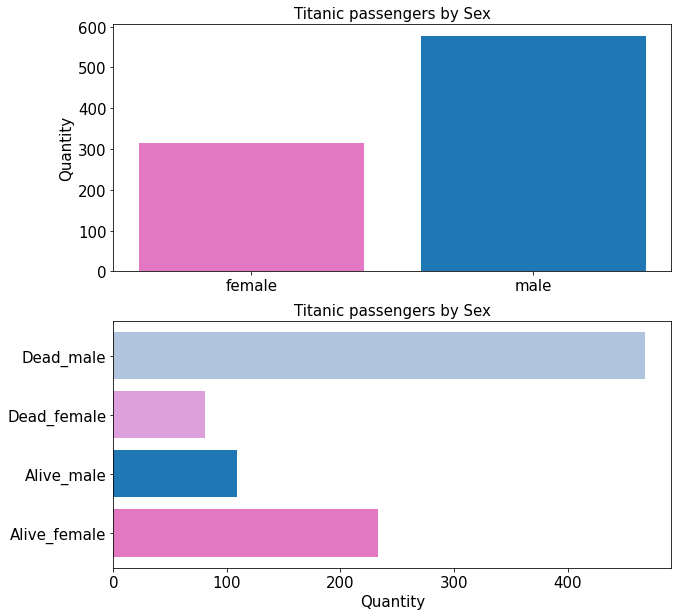

In [8]:
fig, axes = plt.subplots(2,1, figsize=(10,10))

ax=axes[0]

ax.bar(mask1.keys(), mask1.values(), color=['tab:pink', 'tab:blue'])
ax.set_title('Titanic passengers by Sex', fontsize=15)
ax.set_ylabel('Quantity', fontsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.tick_params(axis='x', labelsize=15)


ax=axes[1]

ax.barh(mask2k, mask2v, color=['tab:pink', 'tab:blue','plum','lightsteelblue'])

ax.set_title('Titanic passengers by Sex', fontsize=15)
ax.set_xlabel('Quantity', fontsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.tick_params(axis='x', labelsize=15)

plt.show()

### 3. Створити гістограму для класу квитка пасажирів (кількість пасажирів відповідного класу) та кількості що вижили залежно від класу.

In [9]:
mask1 = dict(titanic_df.groupby(by=['Pclass']).count()['PassengerId'])
mask2 = dict(titanic_df.groupby(by=['Status', 'Pclass']).count()['PassengerId'])

In [10]:
mask2

{('Alive', 1): 136,
 ('Alive', 2): 87,
 ('Alive', 3): 119,
 ('Dead', 1): 80,
 ('Dead', 2): 97,
 ('Dead', 3): 372}

In [11]:
mask2k = [' '.join(str(w)) for w in mask2.keys()]
mask2v = mask2.values()
mask2k

["( ' A l i v e ' ,   1 )",
 "( ' A l i v e ' ,   2 )",
 "( ' A l i v e ' ,   3 )",
 "( ' D e a d ' ,   1 )",
 "( ' D e a d ' ,   2 )",
 "( ' D e a d ' ,   3 )"]

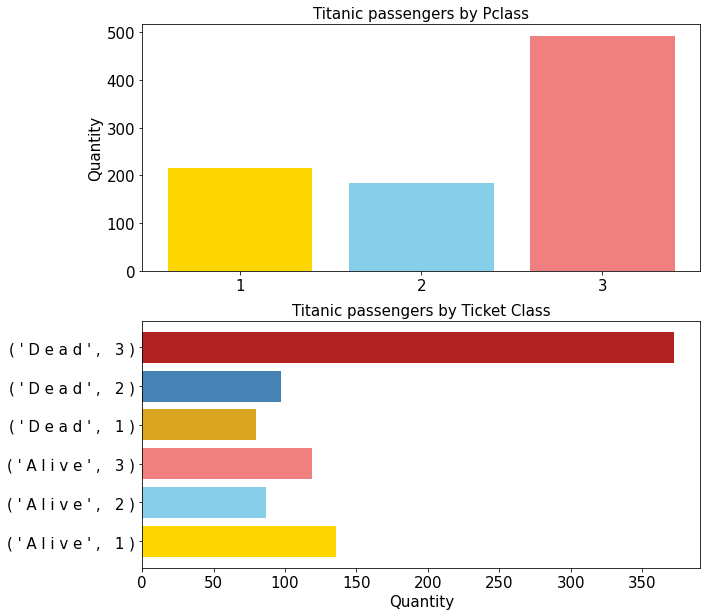

In [12]:
fig, axes = plt.subplots(2,1, figsize=(10,10))

ax=axes[0]

ax.bar(list(map(lambda x: str(x),mask1.keys())), mask1.values(), color=['gold', 'skyblue', 'lightcoral'])
ax.set_title('Titanic passengers by Pclass', fontsize=15)
ax.set_ylabel('Quantity', fontsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.tick_params(axis='x', labelsize=15)


ax=axes[1]

ax.barh(mask2k, mask2v, color=['gold', 'skyblue', 'lightcoral', 'goldenrod', 'steelblue', 'firebrick'])

ax.set_title('Titanic passengers by Ticket Class', fontsize=15)
ax.set_xlabel('Quantity', fontsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.tick_params(axis='x', labelsize=15)

plt.show()

### 4. Створити кругову діаграму по кількості пасажирів за місцем посадки.

In [13]:
titanic_df.groupby(by=['Embarked']).count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Status
Embarked,,,,,,,,,,,,
C,168,168,168,168,168,130,168,168,168,168,69,168
Q,77,77,77,77,77,28,77,77,77,77,4,77
S,644,644,644,644,644,554,644,644,644,644,129,644


In [14]:
titanic_df['Embarked'].head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

In [15]:
names = list(titanic_df['Embarked'].unique())
names

['S', 'C', 'Q', nan]

In [16]:
vals = list(np.array(titanic_df.groupby(by=['Embarked']).count()['PassengerId']))

In [17]:
vals.append(titanic_df['Embarked'].isna().sum())
vals

[168, 77, 644, 2]

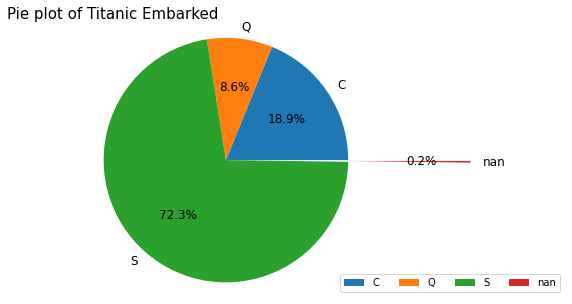

In [18]:
fig = plt.figure()
plt.pie(['168', '77', '644', '2'], labels=['C', 'Q', 'S', 'nan'], explode=(0,0,0,1), autopct='%1.1f%%', textprops={'size': 'large'})
plt.title('Pie plot of Titanic Embarked', fontsize=15, loc='left')
plt.legend(loc='lower right', ncol=4)
plt.axis('equal')
plt.show()

### 5. Побудуйте графіки функцій на відповідних проміжках:

$$y=x^3-2x+1,\ -4≤x≤4$$

$$y=cos 3x -sin x,\ -4≤x≤4$$

$$y=x^2+1x,\ -4≤x≤4$$

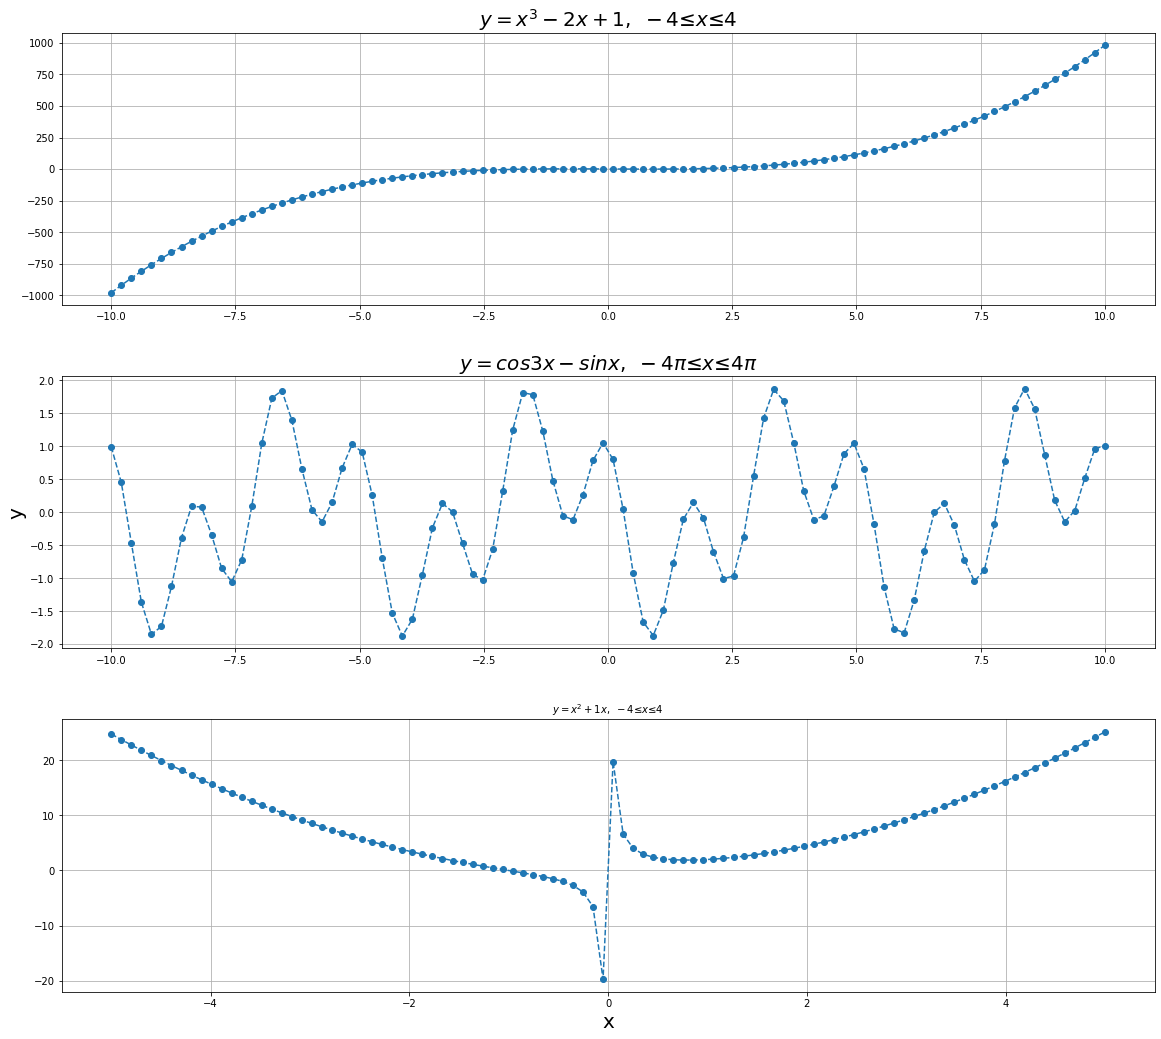

In [19]:
fig, axes = plt.subplots(3,1, figsize=(17, 15))
fig.tight_layout(pad=5)

ax = axes[0]

f = (lambda x: (x**3)-2*x+1)(np.linspace(-10,10, 100))
ax.grid()
ax.set_title('$y=x^3-2x+1,\ -4≤x≤4$', fontsize=20)
ax.plot(np.linspace(-10,10, 100), f, 'o--')

ax = axes[1]

f = (lambda x: (np.cos(3*x))-np.sin(x))(np.linspace(-4*3.14,4*3.14, 100))
ax.grid()
ax.set_title('$y=cos 3x -sin x,\ -4π≤x≤4π$', fontsize=20)
ax.set_ylabel('y', fontsize=20)
ax.plot(np.linspace(-10,10, 100), f, 'o--')

ax = axes[2]

f = (lambda x: (x**2)+1/x)(np.linspace(-5,5, 100))
ax.grid()
ax.set_title('$y=x^2+1x,\ -4≤x≤4$', fontsize=10)
ax.set_xlabel('x', fontsize=20)
ax.plot(np.linspace(-5,5, 100), f, 'o--')

plt.show()